### The Business Problem
The objective of this study is to study neighborhoods in New York City to find the best neighborhood to open a pharmaceutical/Medicine manufacturing company. The company should have a wide variety of employees in terms of cultural diversity to promote a variety of perspectives, increased creativity, global impact, reduced fear, improved performance and boost the brand’s reputation.

#### Importing all required libraries

In [2]:
pip install bs4

     |████████████████████████████████| 112kB 10.3MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geopy

     |████████████████████████████████| 112kB 17.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium

import os
import folium # map rendering library
# Matplotlib and associated plotting modules

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline


print('Libraries imported.')

Libraries imported.


### Scraping New York Citie's population data to obtain a data frame with borough, county, population, gdp per capita, land per square kilometre and persons per square kilometre.

In [5]:
conda install -c anaconda lxml

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    libxslt-1.1.33             |       h7d1a2b0_0         577 KB  anaconda
    lxml-4.5.0                 |   py36hefd8a0e_0         1.6 MB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  libxslt            anaconda/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               anaconda/linux-64::lxml-4.5.0-py36hefd8a0e_0

The following packages wi

In [3]:
response_obj = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
#soup = BeautifulSoup(html, features="xml")
Neighborhoods_NYC_Table = soup.find('table', {'class':'wikitable sortable'})
### preparation of the table 

In [4]:
rows = Neighborhoods_NYC_Table.select("tbody > tr")[3:8]

boroughs = []
for row in rows:
    borough = {}
    tds = row.select('td')
    borough["borough"] = tds[0].text.strip()
    borough["county"] = tds[1].text.strip()
    borough["population"] = float(tds[2].text.strip().replace(",",""))
    borough["gdp_billions"] = float(tds[3].text.strip().replace(",",""))
    borough["gdp_per_capita"] = float(tds[4].text.strip().replace(",",""))
    borough["land_sqm"] = float(tds[5].text.strip().replace(",",""))
    borough["land_sqkm"] = float(tds[6].text.strip().replace(",",""))
    borough["persons_sqm"] = float(tds[7].text.strip().replace(",",""))
    borough["persons_sqkm"] = float(tds[8].text.strip().replace(",",""))
    
    boroughs.append(borough)

print(boroughs)

[{'borough': 'The Bronx', 'county': 'Bronx', 'population': 1432132.0, 'gdp_billions': 42.695, 'gdp_per_capita': 29200.0, 'land_sqm': 42.1, 'land_sqkm': 109.04, 'persons_sqm': 34653.0, 'persons_sqkm': 13231.0}, {'borough': 'Brooklyn', 'county': 'Kings', 'population': 2582830.0, 'gdp_billions': 91.559, 'gdp_per_capita': 34600.0, 'land_sqm': 70.82, 'land_sqkm': 183.42, 'persons_sqm': 37137.0, 'persons_sqkm': 14649.0}, {'borough': 'Manhattan', 'county': 'New York', 'population': 1628701.0, 'gdp_billions': 600.244, 'gdp_per_capita': 360900.0, 'land_sqm': 22.83, 'land_sqkm': 59.13, 'persons_sqm': 72033.0, 'persons_sqkm': 27826.0}, {'borough': 'Queens', 'county': 'Queens', 'population': 2278906.0, 'gdp_billions': 93.31, 'gdp_per_capita': 39600.0, 'land_sqm': 108.53, 'land_sqkm': 281.09, 'persons_sqm': 21460.0, 'persons_sqkm': 8354.0}, {'borough': 'Staten Island', 'county': 'Richmond', 'population': 476179.0, 'gdp_billions': 14.514, 'gdp_per_capita': 30300.0, 'land_sqm': 58.37, 'land_sqkm': 15

In [5]:
df = pd.DataFrame(boroughs, columns=["borough","county", "population", "gdp_per_capita", "persons_sqkm","land_sqkm"])
df

,borough,county,population,gdp_per_capita,persons_sqkm,land_sqkm
0,The Bronx,Bronx,1432132.0,29200.0,13231.0,109.04
1,Brooklyn,Kings,2582830.0,34600.0,14649.0,183.42
2,Manhattan,New York,1628701.0,360900.0,27826.0,59.13
3,Queens,Queens,2278906.0,39600.0,8354.0,281.09
4,Staten Island,Richmond,476179.0,30300.0,3132.0,151.18


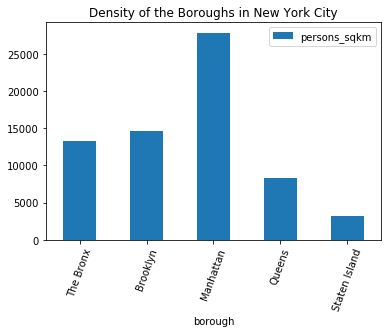

In [6]:
import pandas as pd

import matplotlib.pyplot as plot

# Draw a vertical bar chart

df.plot.bar(x="borough", y=["persons_sqkm"], rot=70, title="Density of the Boroughs in New York City");

plot.show(block=True);

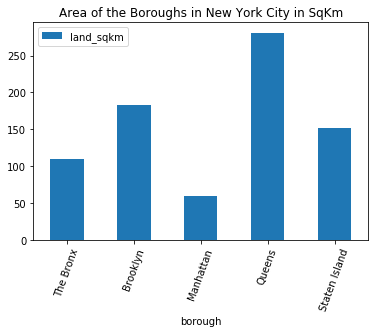

In [7]:
import pandas as pd

import matplotlib.pyplot as plot

# Draw a vertical bar chart

df.plot.bar(x="borough", y=["land_sqkm"], rot=70, title="Area of the Boroughs in New York City in SqKm");

plot.show(block=True);

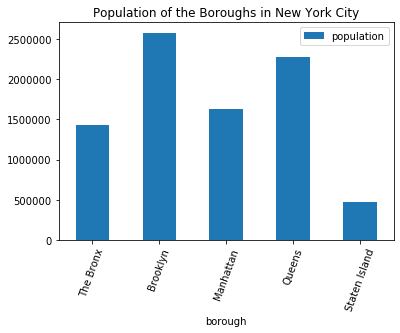

In [7]:
import pandas as pd

import matplotlib.pyplot as plot

# Draw a vertical bar chart

df.plot.bar(x="borough", y="population", rot=70, title="Population of the Boroughs in New York City");

plot.show(block=True);

### Scraping New York citie's population race and ethnicity demographic data from Wikipedia to obtain a data frame that has jurisdiction which is the borough, percentage distribution of white, black or african american, asian, mixed, hispanic latino and other races.

In [10]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Population_Census_Table = soup.select_one('.wikitable:nth-of-type(5)') #use css selector to target correct table.

jurisdictions = []
rows = Population_Census_Table.select("tbody > tr")[2:8]
for row in rows:
    jurisdiction = {}
    tds = row.select('td')
    jurisdiction["jurisdiction"] = tds[0].text.strip()
    jurisdiction["population_census"] = tds[1].text.strip()
    jurisdiction["%_white"] = float(tds[2].text.strip().replace(",",""))
    jurisdiction["%_black_or_african_amercian"] = float(tds[3].text.strip().replace(",",""))
    jurisdiction["%_Asian"] = float(tds[4].text.strip().replace(",",""))
    jurisdiction["%_other"] = float(tds[5].text.strip().replace(",",""))
    jurisdiction["%_mixed_race"] = float(tds[6].text.strip().replace(",",""))
    jurisdiction["%_hispanic_latino_of_other_race"] = float(tds[7].text.strip().replace(",",""))
    jurisdiction["%_catholic"] = float(tds[10].text.strip().replace(",",""))
    jurisdiction["%_jewish"] = float(tds[12].text.strip().replace(",",""))
    jurisdictions.append(jurisdiction)

print(jurisdictions)

[{'jurisdiction': 'Brooklyn', 'population_census': '2,465,326', '%_white': 41.2, '%_black_or_african_amercian': 36.4, '%_Asian': 7.5, '%_other': 10.6, '%_mixed_race': 4.3, '%_hispanic_latino_of_other_race': 19.8, '%_catholic': 4.0, '%_jewish': 8.0}, {'jurisdiction': 'Queens', 'population_census': '2,229,379', '%_white': 44.1, '%_black_or_african_amercian': 20.0, '%_Asian': 17.6, '%_other': 12.3, '%_mixed_race': 6.1, '%_hispanic_latino_of_other_race': 25.0, '%_catholic': 37.0, '%_jewish': 5.0}, {'jurisdiction': 'Manhattan', 'population_census': '1,537,195', '%_white': 54.4, '%_black_or_african_amercian': 17.4, '%_Asian': 9.4, '%_other': 14.7, '%_mixed_race': 4.1, '%_hispanic_latino_of_other_race': 27.2, '%_catholic': 11.0, '%_jewish': 9.0}, {'jurisdiction': 'Bronx', 'population_census': '1,332,650', '%_white': 29.9, '%_black_or_african_amercian': 35.6, '%_Asian': 3.0, '%_other': 25.7, '%_mixed_race': 5.8, '%_hispanic_latino_of_other_race': 48.4, '%_catholic': 14.0, '%_jewish': 5.0}, {'j

In [87]:
df = pd.DataFrame(jurisdictions, columns=["jurisdiction","%_white", "%_black_or_african_amercian", "%_Asian", "%_other", "%_mixed_race", "%_hispanic_latino_of_other_race"])
df = df.rename(columns={'jurisdiction': 'borough'})
df

,borough,%_white,%_black_or_african_amercian,%_Asian,%_other,%_mixed_race,%_hispanic_latino_of_other_race
0,Brooklyn,41.2,36.4,7.5,10.6,4.3,19.8
1,Queens,44.1,20.0,17.6,12.3,6.1,25.0
2,Manhattan,54.4,17.4,9.4,14.7,4.1,27.2
3,Bronx,29.9,35.6,3.0,25.7,5.8,48.4
4,Staten Island,77.6,9.7,5.7,4.3,2.7,12.1
5,NYC Total,44.7,26.6,9.8,14.0,4.9,27.0


Implementing a Simpson diversity index to determine the most diverse borough to locate the pharmaceutical factory at. Simpson's Index of Diversity is 1 - D

The value of this index ranges between 0 and 1, the greater the value, the greater the sample diversity. The index represents the probability that two individuals randomly selected from a sample will belong to different races.

Another way of overcoming the problem of the counter-intuitive nature of Simpson's Index is to take the reciprocal of the Index:

Simpson's Reciprocal Index 1 / D

The value of this index starts with 1 as the lowest possible figure. This figure would represent a community containing only one race. The higher the value, the greater the diversity. The maximum value is the number of races in the sample. For example in this study there are 5 different races counting "other" as a race, therefore, the maximum value is 5.

In [38]:
def simpson_di(data):

    def p(n, N):
        if n is  0:
            return 0
        else:
            return float(n)/N

    N = sum(data.values())
    
    return sum(p(n, N)**2 for n in data.values() if n is not 0)

def inverse_simpson_di(data):
    return float(1)/simpson_di(data)

In [125]:
Brk=df.iloc[0,1:6].to_dict()
Q=df.iloc[1,1:6].to_dict()
M=df.iloc[2,1:6].to_dict()
Brx=df.iloc[3,1:6].to_dict()
S=df.iloc[4,1:6].to_dict()

In [74]:
DI_Brk=inverse_simpson_di(Brk)
DI_Q=inverse_simpson_di(Q)
DI_M=inverse_simpson_di(M)
DI_Brx=inverse_simpson_di(Brx)
DI_S=inverse_simpson_di(S)

In [126]:
DI_df=[DI_Brk,DI_Q,DI_M,DI_Brx,DI_S]
b_df=pd.DataFrame({'Borough': df.iloc[0:5,0],'Inverse_Simpsons_Index':DI_df})
b_df

,Borough,Inverse_Simpsons_Index
0,Brooklyn,3.115750
1,Queens,3.524363
2,Manhattan,2.790661
3,Bronx,3.491011
4,Staten Island,1.619664


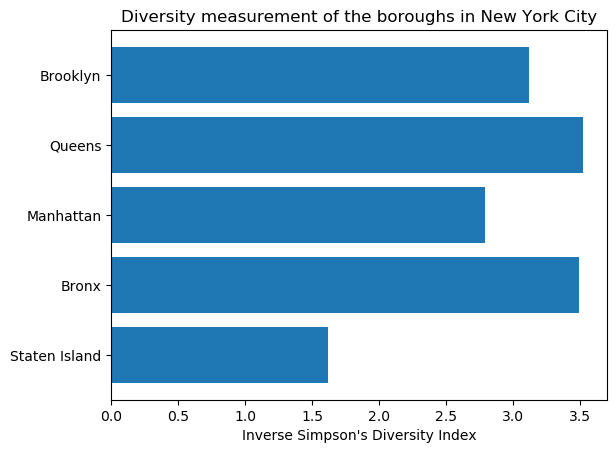

In [124]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(b_df['Borough']))
boroughs = ('Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island')

ax.barh(y_pos, b_df['Inverse_Simpsons_Index'])
ax.set_yticks(y_pos)
ax.set_yticklabels(boroughs)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Inverse Simpson's Diversity Index")
ax.set_title('Diversity measurement of the boroughs in New York City')

plt.show()

# Findings from Exploring New York Citie's Demographic Data

1. Queens has the highest area of all the boroughs in New York city. Brooklyn has the second largest area in the boroughs from new york city. This means that the two best areas to build a pharmaceutical/Medicine manufacturing plant in New York city is at Brooklyn and Queens, these two boroughs have enough area to find the best plot to build a pharmaceutical company, there is a high chance of finding large area building or plots to build a pharmaceutical/medicine manufacturing company that will allow for feature expansion in the case that manufacturing expansion is required due to high demand of pharmaceuticals/medicine.
2. Brooklyn has the highest population in the boroughs in New York city. Queens has the second highest population in the NewYork cities's boroughs which is 12% less than Brooklyn's population. The population of Brooklyn is 12% higher than it's second lowest runner up which makes it ideal to open a business. There will be enough customers. Here I do not conclude this by population alone as the direct customers to the pharmaceutical/medicine manufacture will not directly be the people but pharmacies. Pharmacies are used for this determinant as they buy in large quantities compared to shops and have a 100% certainty of selling medicine/pharmaceuticals in contrast to the shops.
3. Queens has the highest diverse population but Brooklyn's population diversity is not reported in the data available. Staten Island and Manhattan have the lowest diversity in the New York Citie's boroughs, this are therefore not ideal to open the manufacture at for the diversity of the company.
4. The top 3 boroughs with higher cultural diversity is Bronx, Queens and Brooklyn in descending order using the Inverse Simpson’s diversity index. The highest possible index in this study is 5 since we have 5 races and the higher the index the more diverse the borough. It can be seen that Bronx and Queens are the ideal boroughs to locate the factory followed by Brooklyn.
5. Density of Manhattan is very high compared to all other boroughs in New York City. This is not a good thing for a pharmaceutical factory because these kind of industry requires open areas with no dense population to allow for convenient transportation of goods to the customers. Due to the high density of Manhattan, the borough is removed from the possible location to build a pharmaceutical company. The borough will not cater for possible expansion of the factory in future if required. 